<h1>A Star search in Shortest Path from one city to another</h1>



This is the map we'll be using
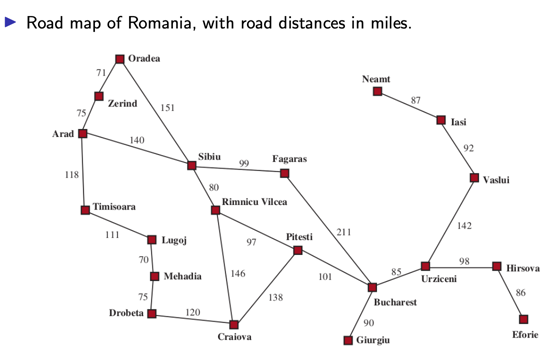




<h1>Heuristic Functions </h1> <br/>
h = Euclidean Distance  <br/>
g = distance from begining city to current city + distance from current city to goal city  <br/>
f = h + g  <br/>


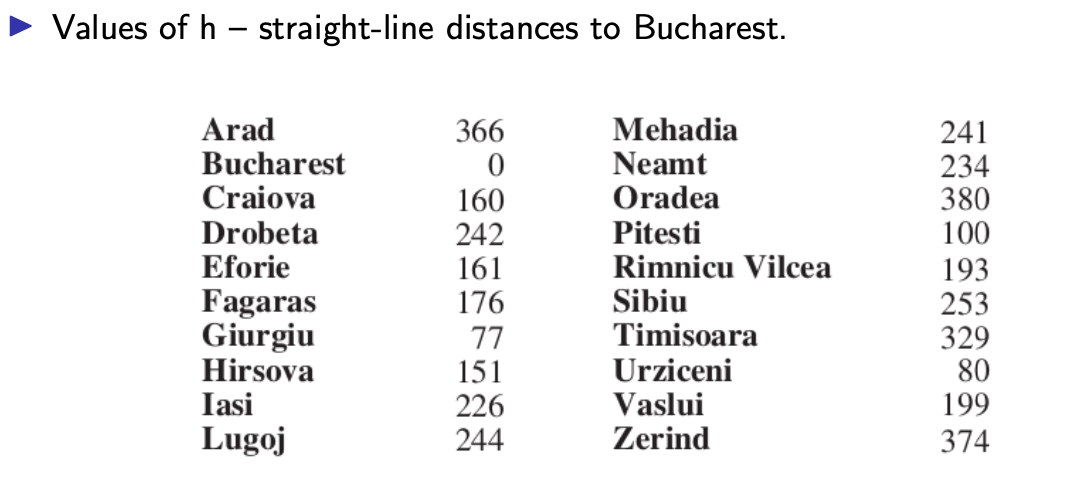

<i style="float: right;">Developed By Maroyi Bisoka on 22/05/2025</i>

In [349]:
# Map Of city 
graph = {}
graph["Arad"] = {"Timisoara": 118, "Sibiu": 140, "Zerind": 75}
graph["Bucharest"] = {"Giurgiu": 90, "Pitesti": 101, "Fagaras": 211, "Urziceni": 85}
graph["Craiova"] = {"Drobeta": 120, "Rimnicu Vilcea": 146, "Pitesti": 138}
graph["Drobeta"] = {"Mehadia": 75, "Craiova": 120}
graph["Eforie"] = {"Hirsova": 86}
graph["Fagaras"] = {"Sibiu": 99, "Bucharest": 211}
graph["Giurgiu"] = {"Bucharest": 90}
graph["Hirsova"] = {"Urziceni": 98, "Eforie": 86}
graph["Iasi"] = {"Neamt": 87, "Vaslui": 92}
graph["Lugoj"] = {"Timisoara": 111, "Mehadia": 70}
graph["Mehadia"] = {"Lugoj": 70, "Drobeta": 75}
graph["Neamt"] = {"Iasi": 87}
graph["Oradea"] = {"Zerind": 71, "Sibiu": 151}
graph["Pitesti"] = {"Rimnicu Vilcea": 97, "Craiova": 138, "Bucharest": 101}
graph["Rimnicu Vilcea"] = {"Sibiu": 80, "Craiova": 146, "Pitesti": 97}
graph["Sibiu"] = {"Arad": 140, "Oradea": 151, "Fagaras": 99, "Rimnicu Vilcea": 80}
graph["Timisoara"] = {"Arad": 118, "Lugoj": 111}
graph["Urziceni"] = {"Bucharest": 85, "Hirsova": 98, "Vaslui": 142}
graph["Vaslui"] = {"Iasi": 92, "Urziceni": 142}
graph["Zerind"] = {"Oradea": 71, "Arad": 75}

In [350]:
graph

{'Arad': {'Timisoara': 118, 'Sibiu': 140, 'Zerind': 75},
 'Bucharest': {'Giurgiu': 90, 'Pitesti': 101, 'Fagaras': 211, 'Urziceni': 85},
 'Craiova': {'Drobeta': 120, 'Rimnicu Vilcea': 146, 'Pitesti': 138},
 'Drobeta': {'Mehadia': 75, 'Craiova': 120},
 'Eforie': {'Hirsova': 86},
 'Fagaras': {'Sibiu': 99, 'Bucharest': 211},
 'Giurgiu': {'Bucharest': 90},
 'Hirsova': {'Urziceni': 98, 'Eforie': 86},
 'Iasi': {'Neamt': 87, 'Vaslui': 92},
 'Lugoj': {'Timisoara': 111, 'Mehadia': 70},
 'Mehadia': {'Lugoj': 70, 'Drobeta': 75},
 'Neamt': {'Iasi': 87},
 'Oradea': {'Zerind': 71, 'Sibiu': 151},
 'Pitesti': {'Rimnicu Vilcea': 97, 'Craiova': 138, 'Bucharest': 101},
 'Rimnicu Vilcea': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
 'Sibiu': {'Arad': 140, 'Oradea': 151, 'Fagaras': 99, 'Rimnicu Vilcea': 80},
 'Timisoara': {'Arad': 118, 'Lugoj': 111},
 'Urziceni': {'Bucharest': 85, 'Hirsova': 98, 'Vaslui': 142},
 'Vaslui': {'Iasi': 92, 'Urziceni': 142},
 'Zerind': {'Oradea': 71, 'Arad': 75}}

In [351]:
# Distance of each city to the goal city (Bucharest)
distance_to_goal = {}
distance_to_goal["Arad"] = 336
distance_to_goal["Bucharest"] = 0
distance_to_goal["Craiova"] = 160
distance_to_goal["Drobeta"] = 242
distance_to_goal["Eforie"] = 161
distance_to_goal["Fagaras"] = 176
distance_to_goal["Giurgiu"] = 77
distance_to_goal["Hirsova"] = 151
distance_to_goal["Iasi"] = 226
distance_to_goal["Lugoj"] = 244
distance_to_goal["Mehadia"] = 241
distance_to_goal["Neamt"] = 234
distance_to_goal["Oradea"] = 380
distance_to_goal["Pitesti"] = 100
distance_to_goal["Rimnicu Vilcea"] = 193
distance_to_goal["Sibiu"] = 253
distance_to_goal["Timisoara"] = 329
distance_to_goal["Urziceni"] = 80
distance_to_goal["Vaslui"] = 199
distance_to_goal["Zerind"] = 374

In [352]:
distance_to_goal

{'Arad': 336,
 'Bucharest': 0,
 'Craiova': 160,
 'Drobeta': 242,
 'Eforie': 161,
 'Fagaras': 176,
 'Giurgiu': 77,
 'Hirsova': 151,
 'Iasi': 226,
 'Lugoj': 244,
 'Mehadia': 241,
 'Neamt': 234,
 'Oradea': 380,
 'Pitesti': 100,
 'Rimnicu Vilcea': 193,
 'Sibiu': 253,
 'Timisoara': 329,
 'Urziceni': 80,
 'Vaslui': 199,
 'Zerind': 374}

In [353]:
def get_actual_cost(graph, path):
    cost = 0
    for i, (city, _) in enumerate(path):
        if i+1 < len(path):
            next_city = path[i+1][0]
            cost = cost + graph[city][next_city]
    return cost

In [354]:
def a_star_helper(graph, distance_to_goal, visited, path, parent_cost_g, start, goal):
    cost = city_name = None
    if start == goal:
        return goal, 0
    
    for city in graph[start]:
        if not visited[city]:
            g = graph[start][city] + parent_cost_g # Distance from start city or current city to next city + parent cost
            f = g + distance_to_goal[city] # cost 
            if cost is None or f < cost:
                cost = f
                city_name, parent_cost_g_to_return = city,  g
    
    visited[start] = 1
    path.append((city_name, cost))
    return city_name, parent_cost_g_to_return

In [355]:
def a_star(graph, distance_to_goal, start, goal):
    path = [(start, 0)] 
    parent_cost = 0
    visited = {city: 0 for city in graph} # Initialize all the city to not visited with value 0
    while start != goal:
        start, cost = a_star_helper(graph, distance_to_goal, visited, path, parent_cost, start, goal)
        parent_cost = cost
    return path

In [356]:
start, goal = 'Arad', 'Bucharest'
path = a_star(graph, distance_to_goal, start, goal)

In [357]:
path

[('Arad', 0),
 ('Sibiu', 393),
 ('Rimnicu Vilcea', 413),
 ('Pitesti', 417),
 ('Bucharest', 418)]

In [358]:
actual_cost = get_actual_cost(graph, path)
print('A Star Search')
print(f"Shortest path from {start} to {goal}:")
print(' -> '.join(city for city, _ in path), end='\n')
print('Actual cost: ', actual_cost)

A Star Search
Shortest path from Arad to Bucharest:
Arad -> Sibiu -> Rimnicu Vilcea -> Pitesti -> Bucharest
Actual cost:  418


In [359]:
def greedy_best_fit_helper(graph, distance_to_goal, visited, path, start, goal):
    cost = city_name = None
    if start == goal:
        return goal
    
    for city in graph[start]:
        if not visited[city]:
            f = distance_to_goal[city] # cost 
            if cost is None or f < cost:
                cost = f
                city_name = city
    
    visited[start] = 1
    path.append((city_name, cost))
    return city_name

In [360]:
def greedy_best_fit(graph, distance_to_goal, start, goal):
    path = [(start, 0)] 
    visited = {city: 0 for city in graph} # Initialize all the city to not visited with value 0
    while start != goal:
        start = greedy_best_fit_helper(graph, distance_to_goal, visited, path, start, goal)
    return path

In [361]:
path = greedy_best_fit(graph, distance_to_goal, start, goal)

In [362]:
path

[('Arad', 0), ('Sibiu', 253), ('Fagaras', 176), ('Bucharest', 0)]

In [363]:
actual_cost = get_actual_cost(graph, path)
print('Greedy Best Fit Search')
print(f"Shortest path from {start} to {goal}:")
print(' -> '.join(city for city, _ in path), end='\n')
print('Actual cost: ', actual_cost)

Greedy Best Fit Search
Shortest path from Arad to Bucharest:
Arad -> Sibiu -> Fagaras -> Bucharest
Actual cost:  450


For this Map A Star Search provide a better path with a total distance to travel from Arad to Bucharest of <strong>418</strong> compare to Greedy Best Fit Search which has a total distance of <strong>450</strong>.<br/>
<br />
    <i>That doesn't means that A Star Search will always provide a better path. It's Better to use both of them and then choose the one that give better result for that specific problem.</i>